<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
# Read in the dataset
import pandas as pd

yelp = pd.read_json('./review_sample.json', lines=True)

In [2]:
# have a quick look at the dataset 
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import spacy
import re

nlp = spacy.load('en_core_web_lg')

stop_words = nlp.Defaults.stop_words.union(['food', 'place', 'restaurant', ' ', 'd', 'm', 'n', 's', 't', 've'])

def tokenize(doc):
        """
            tokenize will check for stop words, punctuation, and Pronouns
            it will also lemmatize to reduce dimensionality
        """
        lemmas = []
        
        doc = re.sub('[^a-zA-Z 0-9]', ' ', doc)
        doc = nlp(doc)  
        
        for token in doc:
            conditions = (token.is_punct == False) and (token.pos_ != 'PRON') and (token.text not in stop_words)
            #conditions = (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token.text not in stop_words)
            if conditions:
                lemmas.append(token.lemma_)

        return lemmas

In [4]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [5]:
print(yelp.shape)
yelp.head()

(10000, 10)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, , fake, fake, fake, , small, bu..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, Service, quick, Staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, step, foot, Circus, Circu..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, , and, go..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3, 5, 4, star, not, bad, price, , 12, 99, l..."


In [6]:
# have a closer look at our tokens 
yelp[['text', 'stars', 'tokens']]

,text,stars,tokens
0,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",1,"[beware, , fake, fake, fake, , small, bu..."
1,Came here for lunch Togo. Service was quick. S...,4,"[come, lunch, Togo, Service, quick, Staff, fri..."
2,I've been to Vegas dozens of times and had nev...,3,"[Vegas, dozen, time, step, foot, Circus, Circu..."
3,We went here on a night where they closed off ...,1,"[go, night, close, street, party, , and, go..."
4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",4,"[3, 5, 4, star, not, bad, price, , 12, 99, l..."
...,...,...,...
9995,My family and I were hungry and this Subway is...,1,"[-PRON-, family, hungry, Subway, open, 24, hou..."
9996,My wife and I came here with a a couple of fri...,3,"[-PRON-, wife, come, couple, friend, the, seve..."
9997,The food was just OK and not anything to brag ...,2,"[the, ok, brag, the, hot, item, tasty, horribl..."
9998,Today's visit is great!! Love and enjoy Town S...,4,"[today, visit, great, , love, enjoy, Town, S..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

1. Import
2. Instanitate
3. Fit
4. Transform

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# the max_features here limit the time for this to run
# max_features = 1000 helps this run smoothly

tfidf = TfidfVectorizer(stop_words=stop_words,  
                        ngram_range=(1,2),
                        max_features = 1000, # this worked at 1000 for time #  downsized from 8000 to 4000
                        tokenizer=tokenize)

In [9]:

tfidf.fit(yelp['text'])

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={' ', "'d", "'ll", "'m", "'re", "'s", "'ve", 'a',
                            'about', 'above', 'across', 'after', 'afterwards',
                            'again', 'against', 'all', 'almost', 'alone',
                            'along', 'already', 'also', 'although', 'always',
                            'am', 'among', 'amongst', 'amount', 'an', 'and',
                            'another', ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7f50c0070158>, use_idf=True,
                vocabulary=None)

In [10]:
dtm = tfidf.transform(yelp['text'])

In [11]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [12]:
dtm.head()

,,,,,,,good,service,2,ask,...,wrap,write,wrong,year,year ago,yelp,yes,young,yum,yummy
0,0.197332,0.139291,0.103645,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.107800,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.086127,0.0,0.0,0.0,0.132355,0.0,0.0
3,0.085847,0.121194,0.000000,0.0,0.0,0.0,0.331252,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.213016,0.060145,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [13]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')

knn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [14]:
fake_review = ['''
                This place is awesome! I would bring my whole family. music, fun and great food!
                ''']

In [15]:
new = tfidf.transform(fake_review)

In [16]:
knn.kneighbors(new.todense())

(array([[0.95079492, 1.        , 1.        , 1.05641979, 1.07585667,
         1.07935928, 1.0875231 , 1.1206975 , 1.12283548, 1.1304681 ]]),
 array([[ 426, 6204, 6311, 1714, 7594, 9943, 9287, 7825, 5634, 3884]]))

In [22]:
distance , label = knn.kneighbors(new.todense())

In [26]:
# list of recommendation id's
label[0]

array([ 426, 6204, 6311, 1714, 7594, 9943, 9287, 7825, 5634, 3884])

In [38]:
type(label[0])

numpy.ndarray

In [39]:
list(label[0])

[426, 6204, 6311, 1714, 7594, 9943, 9287, 7825, 5634, 3884]

In [41]:
recommendations = list(label[0])

In [42]:
# first id in list
recommendations

[426, 6204, 6311, 1714, 7594, 9943, 9287, 7825, 5634, 3884]

In [77]:
for index, recommendation in enumerate(recommendations):
    print("="*80+"\n")
    print(f'{index +1}. {yelp.iloc[recommendation]["text"]} \n')


1. I love the music here and the Kpop videos are awesome! The food here is awesome and the waiter has great personality. 


2. 旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。
質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 
ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。
予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。
また是非マッサージなどで伺いたいと思います。 


3. 天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來 


4. This place is great. Very authentic German food with very authentic recipes. The beer is awesome and the entertainment is great music is wonderful and the servers were all fun. 


5. Great place to hang out SteveO is awesome and makes you feel very welcomed....been here before and will be back more often. Great music and a great atmosphere. Food was great and the drinks were even better. Good times! 


6. Fun indoor zoo and the insectarium was awesome.. don't do the botanical garden in August everything is dead 


7. This is an awesome place to 

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## The nearest neighbors reviews

The 10 nearest neighbor reviews have similar wording to the "fake review". 

They all contain the family environment, fun, music and decor.

The higher the max_features is in the TF-IDF, the more similiar the neighbors.

for the sprint challenge i had to reduce the max features from 8000 down to 4000 and finally down to 1000.

in order to run smoothly and quick enough around 10 mins for most fit and transforms.

NOTE:

I will read more medium articles in order to make my writing and analysis skills more fuller.

In [18]:
# similar review #1 this is the class version Above is a clear fast version
yelp.iloc[426]['text']

'I love the music here and the Kpop videos are awesome! The food here is awesome and the waiter has great personality.'

In [19]:
# similar review #2 this is the class version Above is a clear fast version
yelp.iloc[6204]['text']

'旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。\n質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 \nネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。\n予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。\nまた是非マッサージなどで伺いたいと思います。'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = RandomForestClassifier()

pipe = Pipeline([('tfidf', tfidf), ('clf', clf)])

In [51]:
yelp['stars'].dtype

dtype('int64')

<AxesSubplot:>

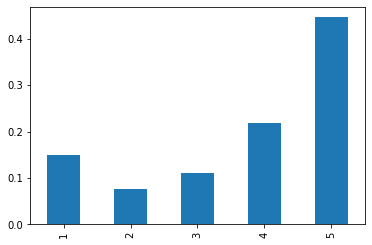

In [52]:
yelp['stars'].value_counts(normalize=True).sort_index().plot(kind='bar')

<AxesSubplot:xlabel='stars', ylabel='count'>

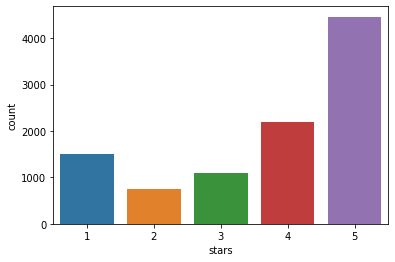

In [53]:
# make it look nicer
import seaborn as sns

sns.countplot(yelp['stars'])

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'tfidf__max_features' : (50, 100) 
}

grid_search = GridSearchCV(pipe, parameters , cv=2, n_jobs=1, verbose=1)

grid_search.fit(yelp['text'], yelp['stars'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=1000,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        n

In [56]:
print(grid_search.predict(fake_review))

[5]


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [57]:
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary


Learn the vocubalary of the yelp data:

In [58]:
id2word = corpora.Dictionary(yelp['tokens'])

Create a bag of words representation of the entire corpus

In [59]:
corpus = [id2word.doc2bow(doc) for doc in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [78]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=6,
                   num_topics = 10 # You can change this parameter
                  )

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:3]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
   the    

------ Topic 1 ------
   the good

------ Topic 2 ------
   the    

------ Topic 3 ------
   the    

------ Topic 4 ------
   the    

------ Topic 5 ------
   the    

------ Topic 6 ------
   the good

------ Topic 7 ------
   the    

------ Topic 8 ------
   the    

------ Topic 9 ------
   the good



/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In the intertopic distance map, it looks like topics 3 and 4 of my top five topics overlapped a little bit. This was probably due to poor modeling, or a lack of variation in the actual texts of the reviews. Many of the top 30 most relevant terms for each topic are very similar. I also noticed a blank value for the most common term. For all the topics, the first two actual words were interchanged in commonality: good and not. This is actually quite interesting, since good carries a positive connotation and not carries a negative one. It would be interesting to see the full set of results to figure out how frequently "good," "not," and "not good" correlate.

At this point, in order to improve the results of the lda model, it would be necessary to dive deeper into the most relevant terms being extracted, and determine which of those are actually salient in determining the rating. The parameters can also use a good hypertuning (jk it's clearly tuning hyperparameters, if any professional ends up reading this for any reason whatsoever).

Create 1-2 visualizations of the results

In [61]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [62]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.005715 -0.001974       1        1  11.172220
2     -0.003733 -0.000623       2        1  10.581857
9     -0.001459  0.002122       3        1  10.503297
6      0.001463  0.001647       4        1   9.885360
8      0.002788 -0.002358       5        1   9.848550
0     -0.001227  0.002576       6        1   9.829308
5      0.001799 -0.001934       7        1   9.815844
3      0.000468  0.000086       8        1   9.710727
7      0.002985 -0.002689       9        1   9.517833
4      0.002631  0.003147      10        1   9.135005, topic_info=        Term          Freq         Total Category  logprob  loglift
0             25468.000000  25468.000000  Default  30.0000  30.0000
41       the   9170.000000   9170.000000  Default  29.0000  29.0000
168    price   1729.000000   1729.000000  Default  28.0000  28.0000
315  service   3461.000000   3461.000000  Default  27.0000  27.0000
89       get   2833.000000   2833.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
382     find    148.929775   1536.647573  Topic10  -5.8429   0.0592
524     tell    144.647925   1459.184621  Topic10  -5.8721   0.0817
731     love    169.414005   2186.168584  Topic10  -5.7140  -0.1645
29      look    146.144102   1899.478152  Topic10  -5.8618  -0.1717
325     want    141.110320   1791.393521  Topic10  -5.8968  -0.1482

[848 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.158434     
0         2  0.134404     
0         3  0.107939     
0         4  0.083281     
0         5  0.080925     
...     ...       ...  ...
427       6  0.095193  yum
427       7  0.081594  yum
427       8  0.095193  yum
427       9  0.163189  yum
427      10  0.067995  yum

[2424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 10, 7, 9, 1, 6, 4, 8, 5])

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [63]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, passes=3, id2word=id2word, workers=12)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_,
                                    'num_topics': num_topics,
                                    'coherence_score':coherencemodel.get_coherence()})

    return coherence_values

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# warnings.filterwarnings("ignore", category=DeprecationWarning)

coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpus,
                                            start=5, 
                                            limit=40, 
                                            step=3,
                                            passes=5)

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
import seaborn as sns

topic_coherence = pd.DataFrame.from_records(coherence_values)

topic_coherence.head(10)

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pass,num_topics,coherence_score
0,0,5,-1.527672
1,0,8,-1.509565
2,0,11,-1.535545
3,0,14,-1.589616
4,0,17,-1.739592
5,0,20,-1.562483
6,0,23,-1.566280
7,0,26,-1.641991
8,0,29,-1.599466
9,0,32,-1.572048


/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


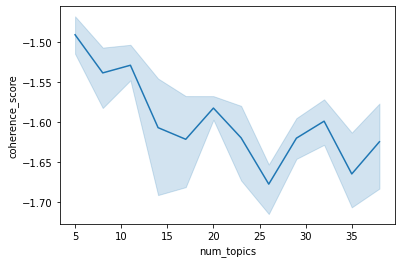

In [67]:
import seaborn as sns

ax = sns.lineplot(x='num_topics', y='coherence_score', data=topic_coherence)


Although this is not necessarily an LDA "result," coherence modeling is quite useful (when your model is good) in determining how many topics to include in your LDA topic model. Here, the highest value is the lowest number, which started at 5. At this point, it would probably be worth it to run the coherence model again with an even smaller number for the start of the iteration.

In [68]:

def sentimentalize(stars):
    if stars == 3:
        return "neutral"
    elif stars > 3:
        return "positive"
    else: 
        return "negative"
    
yelp['sentiment'] = yelp['stars'].apply(sentimentalize)

yelp.head()

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,sentiment
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, , fake, fake, fake, , small, bu...",negative
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, Service, quick, Staff, fri...",positive
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, step, foot, Circus, Circu...",neutral
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, , and, go...",negative
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3, 5, 4, star, not, bad, price, , 12, 99, l...",positive


In [69]:

doc_topics = [lda[doc] for doc in corpus]

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in doc_topics]

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
dft = pd.DataFrame.from_records(new_distro)
# dft.columns = topics ????

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
yelp['primary_topic'] = dft.idxmax(axis=1)

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


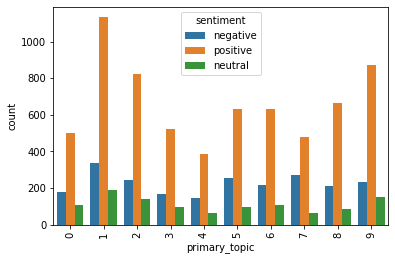

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="primary_topic", hue="sentiment", data=yelp)
plt.xticks(rotation=90)
plt.show()

I created a sentiment analysis of the LSA results to show how the sentiments range between the different topics. As expected, since my model's parameters were not hyptertuned well, the distribution of sentiment aligns closely with the general distribution of ratings; that is to say, since most of the ratings were positive to begin with, and neutral ratings of 3 were the least frequent, the sentiment between the models showed the same distribution. I think yelp reviews are particularly difficult to find good topics for, since the range of descriptors are so few that the same words repeat. It would be beneficial in the future to lower the max_df parameter of the vectorizer so that it doesn't pull words that show up in the vast majority of the reviews. This would increase the salience of specific words.